# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

Đáp án: A

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

Đáp án: D

**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.

Đáp án: B

**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

Đáp án: B

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

Đáp án: C

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

In [ ]:
import torch

A = torch.randn(size=[3, 32, 32], dtype=torch.float)
A.size()

torch.Size([3, 32, 32])

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

In [ ]:
R = A[ :1, : , :]
G = A[1:2, : , :]
B = A[-1:, : , :]

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

In [ ]:
#hadamard
hadamard = R*G
print(hadamard.shape)
#normal
normal = R@G
print(normal.shape)

torch.Size([1, 32, 32])
torch.Size([1, 32, 32])


9) Từ bộ dữ liệu Income-Classification hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/DL/3.PytorchHomeWork_HauTran")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import random
def seed_all(seed):
  np.random.seed(seed)
  random.seed(seed)
seed = 33
seed_all(seed)

In [ ]:
import re
import pandas as pd
income_data = pd.read_csv('data/train.csv').dropna()

In [ ]:
#normalize string
def string_normalize(s):
  s = str(s).lower().strip()
  s = re.sub(' +', ' ', s)
  return s
#encode category and object colums
def process(df):
  for col in df.columns:
    if df[col].dtype.name =='object' or df[col].dtype.name =='category':
      df[col] = df[col].apply(string_normalize).astype("category")
  return df
income_data = process(income_data.copy())

In [ ]:
IDs = income_data.pop('ID')
label = income_data.pop('target_income')
income_data_one_hot = pd.get_dummies(income_data)

In [ ]:
features = income_data_one_hot.columns.tolist()
label = (label.values).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(income_data_one_hot[features].values,
                                                    label,
                                                    test_size = 0.2,
                                                    random_state = 0)
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

#normalize
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Set: 20000, Test Set: 5000 



In [ ]:
!pip freeze | grep torch

torch @ https://download.pytorch.org/whl/cu111/torch-1.10.0%2Bcu111-cp37-cp37m-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu111/torchaudio-0.10.0%2Bcu111-cp37-cp37m-linux_x86_64.whl
torchsummary==1.5.1
torchtext==0.11.0
torchvision @ https://download.pytorch.org/whl/cu111/torchvision-0.11.1%2Bcu111-cp37-cp37m-linux_x86_64.whl


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
#Prepare the data for PyTorch
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=1000,
    shuffle=True)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=1000,
    shuffle=False)
print('Ready to load data')

Ready to load data


10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.

In [ ]:
# Define a neural network
# Number of hidden layer nodes
hl = 10

# Define the neural network
class Income(nn.Module):
    def __init__(self):
        super(Income, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Create a model instance from the network
model = Income()
print(model)

Income(
  (fc1): Linear(in_features=108, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
import time
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor

        #feedforward: calculate y_pred and loss function
        optimizer.zero_grad()
        out = model(data)

        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate: compute gradient descent and update weights
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor

            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            predicted = (out.data > 0.5)
            predicted = predicted.reshape(-1,1)
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss
#loss funtion
loss_criteria = nn.BCELoss()

# Use an "Adam" optimizer to adjust weights
learning_rate = 0.05
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 0.505998
Validation set: Average loss: 0.420474, Accuracy: 3811/5000 (76%)

Epoch: 2
Training set: Average loss: 0.402106
Validation set: Average loss: 0.373070, Accuracy: 3811/5000 (76%)

Epoch: 3
Training set: Average loss: 0.372226
Validation set: Average loss: 0.353264, Accuracy: 4235/5000 (85%)

Epoch: 4
Training set: Average loss: 0.358336
Validation set: Average loss: 0.343310, Accuracy: 4241/5000 (85%)

Epoch: 5
Training set: Average loss: 0.349993
Validation set: Average loss: 0.336730, Accuracy: 4239/5000 (85%)

Epoch: 6
Training set: Average loss: 0.343707
Validation set: Average loss: 0.332292, Accuracy: 4248/5000 (85%)

Epoch: 7
Training set: Average loss: 0.339042
Validation set: Average loss: 0.328192, Accuracy: 4254/5000 (85%)

Epoch: 8
Training set: Average loss: 0.335232
Validation set: Average loss: 0.325989, Accuracy: 4254/5000 (85%)

Epoch: 9
Training set: Average loss: 0.331760
Validation set: Average loss: 0.324011, Accuracy: 

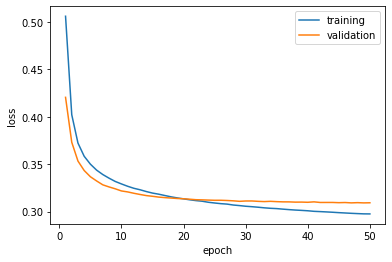

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

ACCURACY_SCORE:  0.8524
F1_SCORE:  0.7868
CONFUSION_MATRIX:
 [[3518  293]
 [ 445  744]] 

              precision    recall  f1-score   support

           0     0.8877    0.9231    0.9051      3811
           1     0.7175    0.6257    0.6685      1189

    accuracy                         0.8524      5000
   macro avg     0.8026    0.7744    0.7868      5000
weighted avg     0.8472    0.8524    0.8488      5000
 



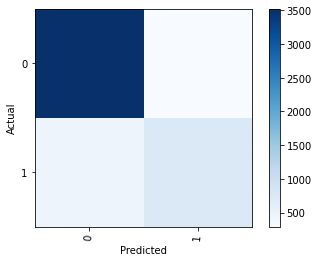

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



def _evaluate(model, x_test):
  # Set the model to evaluate mode
  model.eval()

  # Get predictions for the test data
  x = torch.Tensor(x_test).float()
  predictions = (model(x).data > 0.5)
  predictions = predictions.reshape(-1,1)
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  income_classes=['0','1']
  cm = confusion_matrix(y_test, predictions)
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, income_classes, rotation=85)
  plt.yticks(tick_marks, income_classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

_evaluate(model, x_test)